# Problem 6

Use a computer to find a numerical solution of the equation of motion (12.11)
for a DDP with the following parameters: drive strength $\gamma$ = 1.073, drive frequency $\omega = 2\pi$, natural
frequency $\omega_{0}$ = 1.5$\omega$, damping constant $\beta$ = $\omega_{0}/4$, and initial conditions $\phi(0)$  = $\pi/2$ and $\dot\phi(0)$ = 0

#### a) Solve for  $0 \leq t \leq 50$, and then plot the first ten cycles, $0 \leq t \leq 10. $

(12.11) $\ddot\phi + 2\beta\dot\phi + \omega_{0}^{2}sin\phi = \gamma \omega_{0}^{2}cos\omega t$

rewrite with $z \equiv \dot x$

$x[1]$ = $\dot z$ & $x[0] = z$


In [1]:
#import proper packages for cos, ODE solver, and pi
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
#set constants as defined in 12.8
gamma = 1.073
w = 2 * math.pi
w_0 = 1.5 * w
beta = w_0 / 4

define function to return $\dot z$ and $\ddot z$

In [3]:
def dz(x,t):
    return [x[1], gamma*(w_0**2)*np.cos(w*t) - 2*beta*x[1] - (w_0**2)*np.sin(x[0])]

set time range $0 \leq t \leq 50$

In [4]:
t = np.arange(0, 50, 1e-4)

In [5]:
#solve and unpack ODEINT function into phi and phi_dot
#[pi/2,0] implies that z[0] = pi/2 and zdot[0] = 0
phi, phi_dot = odeint(dz, [np.pi/2, 0], t).T  

plot first ten cycles, $0 \leq t \leq 10. $

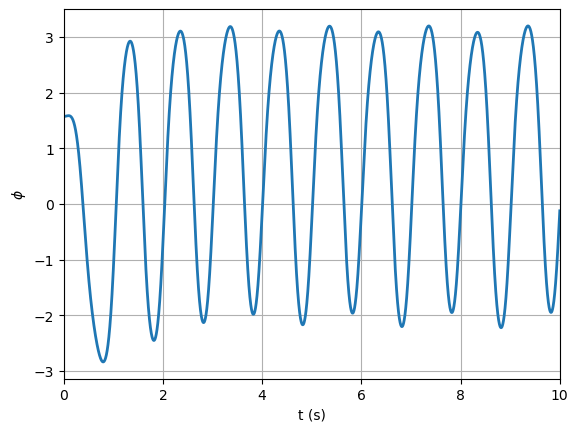

In [6]:
plt.plot(t, phi, linewidth = 2)
plt.xlabel('t (s)')
plt.ylabel('$\phi$')
plt.xlim(0,10)
plt.grid(True)
plt.show()

#### b) To be sure that the initial transients have died out, plot the ten cycles $40 \leq t \leq 50.$ What is the period of the long-term motion (the attractor)?

find period

In [7]:
#cut down phi to stable portion
phi_stable = phi[-100000:]
t_stable = t[-100000:]

#min of phi_stable occurs below -2, and 'false' min
#does not. so, by finding the indices of where these
#values occur in phi, we can find the corresponding
#time values.

#define array to save indices
index = []

#find the index where min values occur in phi_stable
for i in range(len(phi_stable)):
    if phi_stable[i] < -2:
        index += [i]

#find t values for two given mins
t1 = t_stable[7529]
t3 = t_stable[27529]

#find period
period = t3 - t1

print("period = ", period)

period =  2.0


plot

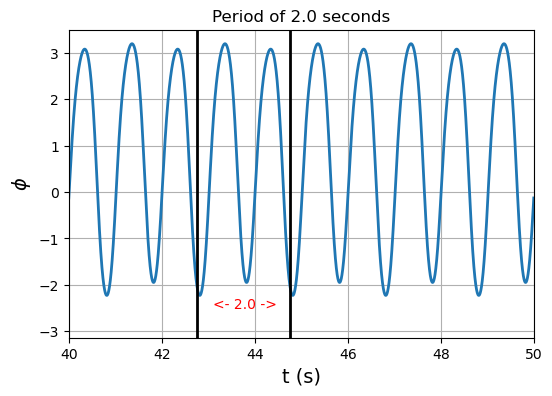

In [8]:
plt.rcParams["figure.figsize"] = (6, 4)
plt.plot(t, phi, linewidth = 2)
plt.xlabel('t (s)', fontsize = 14)
plt.ylabel('$\phi$', fontsize = 14)
plt.xlim(40,50)
plt.grid(True)
plt.title("Period of 2.0 seconds")

plt.axvline(t3 ,-5,5, c = 'black', linewidth = 2)
plt.axvline(t3 + 2,-5,5, c = 'black', linewidth = 2)

plt.annotate('<- 2.0 ->', (43.1,-2.5), c = 'red')


plt.show()

# Problem 7

Lotka-Volterra equations

https://en.wikipedia.org/wiki/Lotka-Volterra_equations
    
Using your favorite software, plot the solution for the number of rabbits x and
foxes y in the (x, y) plane, for some chosen values of the parameters α, β, γ and
δ. Find the candidate fixed points and investigate their stability.

$\dot{x}$ = $\alpha x - \beta x y$

$\dot{y}$ = $\delta x y - \gamma y$

x is number of prey

y is number of some predator

In [9]:
#define constants
alpha = .6
beta = .5
gamma = .5
delta = .3

dt = 0.001
max_t = 100

In [10]:
# initial time and populations
t = 0
x = 1.0
y = 0.5

# initialize arrays to store solutions
t_array = []
x_array = []
y_array = []

while t < max_t:
    # calc new values for t, x, y
    t = t + dt
    x = x + (alpha*x - beta*x*y)*dt
    y = y + (-delta*y + gamma*x*y)*dt

    # save values
    t_array.append(t)
    x_array.append(x)
    y_array.append(y)


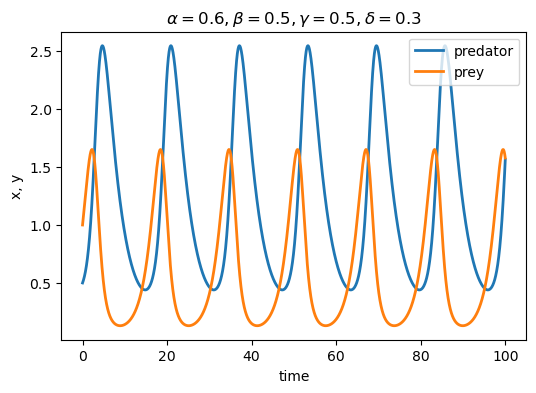

In [11]:
# Plot the results
plt.plot(t_array, y_array, linewidth = 2)
plt.plot(t_array, x_array, linewidth = 2)
plt.legend(labels = ['predator', 'prey'])
plt.xlabel('time')
plt.ylabel('x, y')
plt.title(r'$\alpha = 0.6, \beta = 0.5, \gamma = 0.5, \delta = 0.3$')
plt.show()

The candidate fixed points occur when neither population is changing. This can be solved for by setting the derivate of both equations to 0. i.e.

$x (\alpha - \beta y) = 0$

$-y (\gamma - \delta x) = 0$

which gives two candidate fixed points

{ ${x=0, y=0}$ }

{ $x = \gamma / \delta , y = \alpha / \beta $ } 

The Jacobian Matrix of this model at (0,0) is:

\begin{bmatrix}\alpha -\beta y&-\beta x\\\delta y&\delta x-\gamma \end{bmatrix}

when evaluated at the origin, this model has eigenvalues $\lambda_{1} = \alpha, \lambda_{2} = -\gamma$

This fixed point is a saddle point since one eigenvalue is positive while the other is negative (since $\alpha$ and $\gamma$ are always positive values).

At the second point, the Jacobian Matrix is:

\begin{bmatrix}0&-{\frac {\beta \gamma }{\delta }}\\{\frac {\alpha \delta }{\beta }}&0\end{bmatrix}

with eigenvalues $\lambda_{1} = i\sqrt{\alpha \gamma} , \lambda_{2} = -i\sqrt{\alpha\gamma} $ which are imaginary and conjugate to eachother. This means this point must either be a

   - center for closed orbits in local vicinity (for conservative systems)
   - attractive or repulsive spiral (non-conservative systems)
   
however, if we eliminate time to produce one single differential equation,

$\frac {dy}{dx} =-{\frac {y}{x}}{\frac {\delta x-\gamma }{\beta y-\alpha }}$

we can solve by integrating

$\frac {\beta y-\alpha }{y}\,dy+{\frac {\delta x-\gamma }{x}}\,dx=0$

to get 
$V=\delta x-\gamma \ln(x)+\beta y-\alpha \ln(y)$

This is a conserved quantity; thus, the point must be a center for closed orbits that exist at the minimum and maxima. These solutions are periodic with $\omega ={\sqrt {\lambda _{1}\lambda _{2}}}={\sqrt {\alpha \gamma }}$ and period 
$T=2{\pi }/({\sqrt {\lambda _{1}\lambda _{2}}})$

The predator and prey populations oscillate around this fixed point with with frequency ${\sqrt {\alpha \gamma }}$